<a href="https://www.kaggle.com/code/suleymamnerim/amazon-seller-analysis?scriptVersionId=103906491" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Order Details Analysis

Thanks to PRANALI BOSE and KEERTHANA VIVIN. I have got help from their codes.
This is my first study in data analysis. Please give me comments so that I can improve myself.
The analysis is still ongoing, I will add couple of charts and classification algorithm.

### About
Boss Leathers is a small leather products business which has recently started selling its products on Amazon. Currently, it has around 40 SKUs registered in the Indian Marketplace. Over the past few months, it has incurred some loss due to return orders. Now, Boss Leather seeks help to predict the liklihood of a new order being rejected. This would help them to take necessary actions and subsequently reduce the loss.

### Objective
To build a model which would predict the order status (Delivered to buyer or Returned to seller)

### Data Dictionary
The Order data is provided in an excel file. The columns are: 

#### Independent Features:

* order_no - Unique Amazon Order Number
* order_date - Date on which the order was placed
* buyer - Name of the buyer
* ship_city - Delivery Address City
* ship_state - Delivery Address State
* sku - Unique identifier of a product
* description - Product description
* quantity - Number of units ordered
* item_total - Total amount paid by the buyer
* shipping_fee - Charges borne by Boss Leathers to ship the item 
* cod - Mode of payment: Cash on delivery or not

#### Label / Target Feature:

* order_status - Status of the order

In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-seller-order-status-prediction/orders_data.xlsx


In [2]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 4.8 MB/s eta 0:00:00


## Import Packages

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


 ## Import Data

In [4]:
data=pd.read_excel('../input/amazon-seller-order-status-prediction/orders_data.xlsx')


## Undestand the Data

In [5]:
data.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


In [6]:
data.describe(include="all")

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
count,171,171,171,171,171,171,171,171.000000,153,145,47,171
unique,171,171,149,81,30,54,61,NaN,18,13,1,2
top,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Geetika,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,NaN,₹449.00,₹84.96,Cash On Delivery,Delivered to buyer
freq,1,1,3,17,31,33,33,NaN,52,100,47,160
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.087719,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.445132,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


*** 
* There are 171 datapoints and 12 features
* order_no and date are unique
* One buyer made at most 3 orders
* City,state, sku and description need further analysis
* The ordered quantity is at most 4 but median is 1 
* Item_total and shipping_fee should be converted to float
* Cash on delivery has only 1 value, so it seems like boolean
* Order status is target variable, and has 2 classes.
***

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_no      171 non-null    object
 1   order_date    171 non-null    object
 2   buyer         171 non-null    object
 3   ship_city     171 non-null    object
 4   ship_state    171 non-null    object
 5   sku           171 non-null    object
 6   description   171 non-null    object
 7   quantity      171 non-null    int64 
 8   item_total    153 non-null    object
 9   shipping_fee  145 non-null    object
 10  cod           47 non-null     object
 11  order_status  171 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


In [8]:
[features for features in data.columns if data[features].isnull().sum()>0]

['item_total', 'shipping_fee', 'cod']

***
* item_total, shipping_fee and cod has missing values, we should deal with them
* Order_data should be date dtype
* Item_total and Shipping_fee should be float or int
* Cod should be boolean
* Order_status is also should be boolean
***

## Data Cleaning

In [9]:
data["order_date"]= pd.to_datetime(data['order_date'])
data["order_year"]=data["order_date"].dt.year
data["order_month"]=data["order_date"].dt.month
data['order_week'] = data['order_date'].dt.week
data["order_day"]=data["order_date"].dt.day

data['order_weekday'] = data['order_date'].dt.weekday

data['order_time'] = data['order_date'].dt.time
data['order_date_extracted'] = data['order_date'].dt.date

data.drop("order_date",axis=1,inplace=True)


/opt/conda/lib/python3.7/site-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [10]:
# removing comma from city and state and make it upper case
locations = ['ship_city', 'ship_state']
for i in locations:
    data[i] = data[i].apply(lambda x: x.replace(',', '').upper())

In [11]:
data["buyer"]= data["buyer"].apply(lambda x: x.upper())

In [12]:
data["sku"] = data["sku"].apply(lambda x: x[5:])
data["sku"]=data["sku"].str.replace('-',"")
data["sku"]=data["sku"].apply(lambda x: x.replace(' ', ''))

In [13]:
# remove rupee symbol and commas from amount features
amounts = ['item_total', 'shipping_fee']
for i in amounts:
    data[i]=pd.to_numeric(data[i].str.replace(',',"").str.extract(r'([\d]+\.[\d]+)')[0])


## Data Imputation

In [14]:
#The method of payment should be cash on delivery otherwise online.
data["cod"].fillna("Online",inplace=True)

<AxesSubplot:xlabel='shipping_fee'>

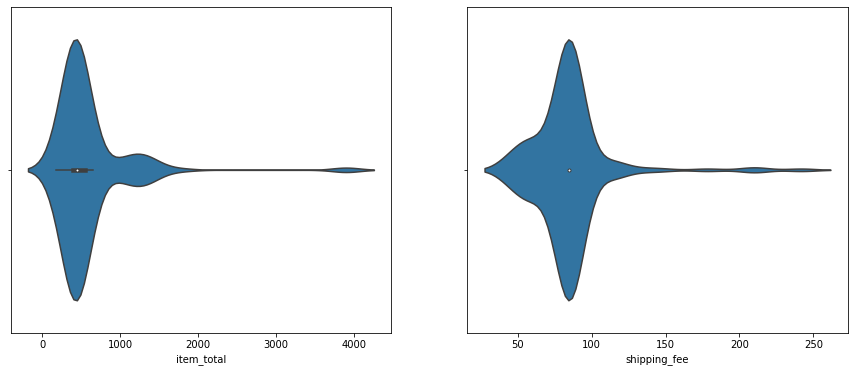

In [15]:
#There are still some null values in item_total and shipping_fee

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.violinplot(x=data.item_total)
plt.subplot(1,2,2)
sns.violinplot(x=data.shipping_fee)

***
* The data is right skewed and there are some outliers. 
* We should use median instead of mean by doing imputation.
* Median will be less prone to outliers.
***

In [16]:
 # impute missing values via simpleImputer by using strategy=median
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy="median",)
data[['item_total', 'shipping_fee']]=imputer.fit_transform(data[['item_total', 'shipping_fee']])

***
* Now, Data has no missing values 
* The cleaning is also done
***

## Exploratory Analysis of Data

In [17]:
data.describe(include="all")

,order_no,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,order_year,order_month,order_week,order_day,order_weekday,order_time,order_date_extracted
count,171,171,171,171,171,171,171.000000,171.000000,171.000000,171,171,171.000000,171.000000,171.000000,171.000000,171.000000,171,171
unique,171,147,74,26,54,61,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,154,117
top,405-9763961-5211537,GEETIKA,MUMBAI,MAHARASHTRA,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,NaN,NaN,NaN,Online,Delivered to buyer,NaN,NaN,NaN,NaN,NaN,20:53:00,2021-12-04
freq,1,3,20,32,33,33,NaN,NaN,NaN,124,160,NaN,NaN,NaN,NaN,NaN,2,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.087719,568.766082,84.780585,NaN,NaN,2021.187135,8.426901,35.058480,15.561404,3.052632,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.445132,463.371967,24.447241,NaN,NaN,0.391165,3.746242,15.763214,8.989571,1.997832,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,175.000000,47.200000,NaN,NaN,2021.000000,1.000000,1.000000,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,399.000000,84.960000,NaN,NaN,2021.000000,7.000000,30.000000,8.500000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,449.000000,84.960000,NaN,NaN,2021.000000,10.000000,40.000000,16.000000,3.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,475.000000,84.960000,NaN,NaN,2021.000000,11.000000,47.000000,23.000000,5.000000,NaN,NaN


### Sales vs States

<AxesSubplot:title={'center':'total quantity of sales by states'}, xlabel='quantity', ylabel='ship_state'>

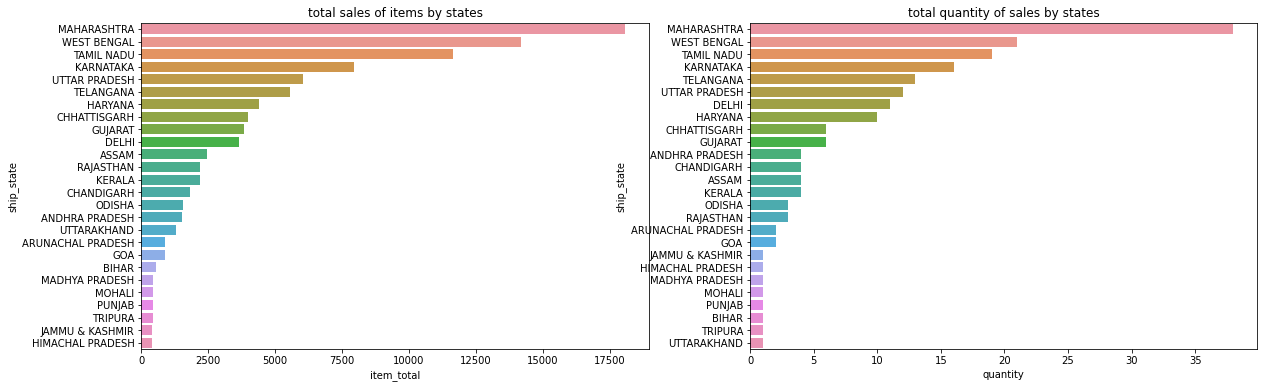

In [18]:
#Sales based on cities and states
plt.figure(figsize=(20,6))

ax1 = plt.subplot(1, 2, 1)
plt.title("total sales of items by states")
data_ship_state=data.groupby("ship_state").aggregate("sum").sort_values("item_total",ascending=False)
sns.barplot(y=data_ship_state.index,x=data_ship_state["item_total"])

ax2 = plt.subplot(1,2,2)
plt.title("total quantity of sales by states")
data_ship_state=data.groupby("ship_state").aggregate("sum").sort_values("quantity",ascending=False)
sns.barplot(y=data_ship_state.index,x=data_ship_state["quantity"])

***
* Item_total: Top 5 cities Mahasrashtra, West Bengal, Tamil Nadu, Karnataka and Uttar Pradesh 
* Total Quantity of Orders: Top 5 cities Mahasrashtra, West Bengal, Tamil Nadu, Karnataka and Telangana
* The two charts are almost alike which is normal, more quantity of item yields more sales (Item_total)
***

In [19]:
data.head(2)

,order_no,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,order_year,order_month,order_week,order_day,order_weekday,order_time,order_date_extracted
0,405-9763961-5211537,MR.,CHANDIGARH,CHANDIGARH,2X3C0FKNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,84.96,Online,Delivered to buyer,2021,7,28,18,6,22:38:00,2021-07-18
1,404-3964908-7850720,MINAM,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online,Delivered to buyer,2021,10,42,19,1,18:05:00,2021-10-19


### Sales vs Payment Method and Returned to Seller

In [20]:
data_hist=data[['cod', 'order_status', 'item_total']].groupby(['cod', 'order_status']).sum().reset_index()
data_hist

,cod,order_status,item_total
0,Cash On Delivery,Delivered to buyer,23812.0
1,Cash On Delivery,Returned to seller,2245.0
2,Online,Delivered to buyer,68508.0
3,Online,Returned to seller,2694.0


<AxesSubplot:xlabel='cod', ylabel='item_total'>

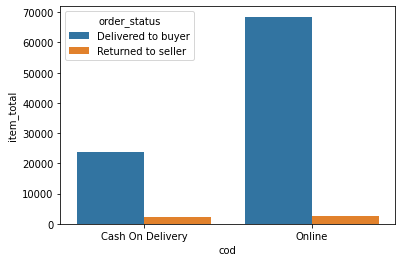

In [21]:
sns.barplot(data=data_hist,x="cod",y="item_total",hue="order_status",)

In [22]:
print("The percentage of returned to seller for Online Sales")
print("{:.2f} %".format(data_hist.loc[3,"item_total"]/data_hist.loc[2,"item_total"]*100))
print("The percentage of returned to seller for Cash on Delivery")
print("{:.2f} %".format(data_hist.loc[1,"item_total"]/data_hist.loc[0,"item_total"]*100))

The percentage of returned to seller for Online Sales
3.93 %
The percentage of returned to seller for Cash on Delivery
9.43 %


***
* Online payment is almost 3 times as big as cash on delivery payment method.
* Cash on delivery payment method has "Returned to seller" almost 3 times as big as online payment
* We may consider promotion for online payment method.
***

### Payment Method vs Shipping Fee

In [23]:
data_hist=data[['cod', 'shipping_fee','quantity']].groupby(['cod']).sum().reset_index()
data_hist["fee per quantity"]=data_hist["shipping_fee"]/data_hist["quantity"]
data_hist

,cod,shipping_fee,quantity,fee per quantity
0,Cash On Delivery,3904.62,49,79.686122
1,Online,10592.86,137,77.320146


***
* The fee per quantity of payment methods almost the same. (2 $ difference is negligible.)
* Maybe we should consider decreasing the of for shipping with online payment
* Or increasing fee of shipping with cash on delivery
***

### SKU and Buyer vs Returned to Seller

* Lets check is there any relation with specific buyers or sku's with returned to seller

<AxesSubplot:xlabel='count', ylabel='sku'>

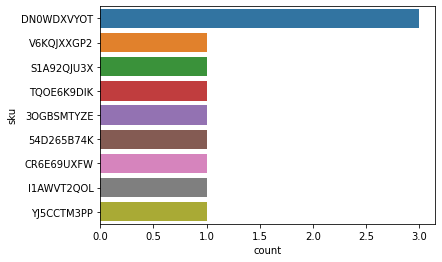

In [24]:
data_sku=data.groupby(['sku','order_status']).agg({'order_status':'count',})
data_sku.rename(columns={"order_status":"count"},inplace=True)
data_sku.sort_values(by="count",ascending=False,inplace=True)
data_sku.reset_index(inplace=True)
data_sku_returned=data_sku.loc[data_sku['order_status']=='Returned to seller',:]
sns.barplot(data=data_sku_returned,y="sku",x="count")

In [25]:
# Check specifically SKU: DN0WDXVYOT
data_one_sku=data.loc[data["sku"]=="DN0WDXVYOT",:]
data_one_sku=data_one_sku.groupby(['sku','order_status']).agg({'order_status':'count',})
data_one_sku.rename(columns={"order_status":"count"},inplace=True)
data_one_sku.reset_index(inplace=True)
print(data_one_sku)

returned=int(data_one_sku.loc[data_one_sku["order_status"]=="Returned to seller","count"])
delivered=int(data_one_sku.loc[data_one_sku["order_status"]=="Delivered to buyer","count"])

print("Returned / Delivered ratio : {:.2f} %".format(returned/delivered*100))

          sku        order_status  count
0  DN0WDXVYOT  Delivered to buyer     30
1  DN0WDXVYOT  Returned to seller      3
Returned / Delivered ratio : 10.00 %


<AxesSubplot:xlabel='count', ylabel='buyer'>

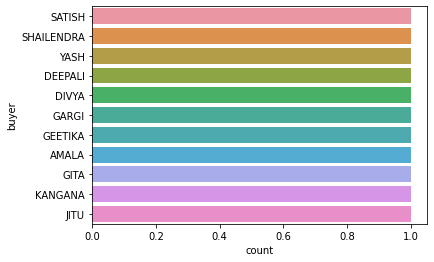

In [26]:
data_buyer=data.groupby(['buyer','order_status']).agg({'order_status':'count',})
data_buyer.rename(columns={"order_status":"count"},inplace=True)
data_buyer.sort_values(by="count",ascending=False,inplace=True)
data_buyer.reset_index(inplace=True)
data_sku_returned=data_buyer.loc[data_buyer['order_status']=='Returned to seller',:]
sns.barplot(data=data_sku_returned,y="buyer",x="count")

***
* SKU: DN-0WDX-VYOT was returned 3 times, the other 8 SKU's are only 1 times.
* SKU: DN-0WDX-VYOT has return/delivered ratio : 10 % 
* We should consider the quality and properties of SKU: DN-0WDX-VYOT
* 11 different buyers returned only 1 times, there is no specific pattern here.
* Maybe we should collect more info of returned sku's because we only have 11 return to seller raw.

***

## Sales over Dates

In [27]:
data_date=data.groupby(["order_year","order_month"]).aggregate({"item_total":"sum"}).reset_index().sort_values(by=["order_year","order_month"])
data_date

,order_year,order_month,item_total
0,2021,6,2147.0
1,2021,7,2844.0
2,2021,8,8089.0
3,2021,9,9533.0
4,2021,10,12775.0
5,2021,11,15019.0
6,2021,12,30330.0
7,2022,1,8809.0
8,2022,2,7713.0


Text(0.5, 1.0, 'Sales vs Year')

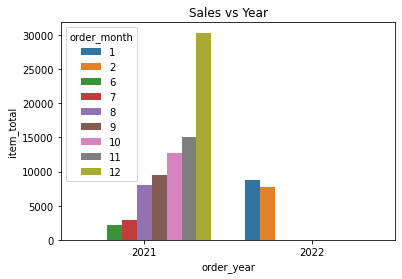

In [28]:
sns.barplot(data=data_date,x="order_year",y="item_total",hue="order_month")
plt.title("Sales vs Year")

***
* Sales(item_total) increases in 2021, there is an increasing trend
* After 2021 the sales are dropped, maybe people made too much expenditure at the end of the year.

***


Text(0.5, 1.0, 'Sales over years with order_status differentiation')

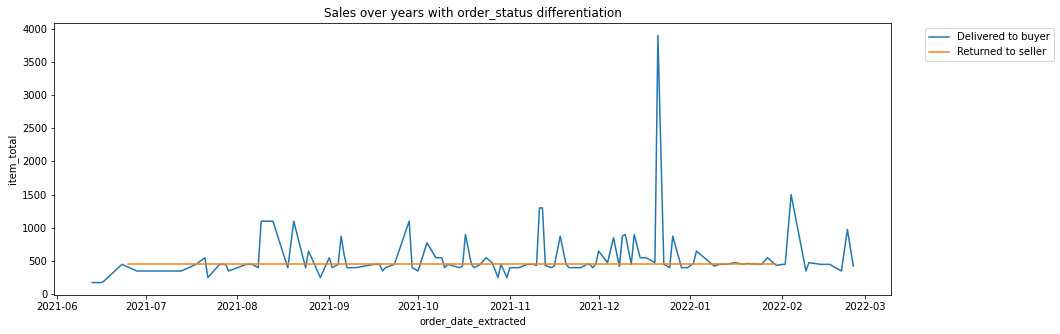

In [29]:
plt.figure(figsize=(15,5))

lp = sns.lineplot(data=data,x="order_date_extracted",y="item_total",hue="order_status",markers=True,ci=0)
lp.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("Sales over years with order_status differentiation")

***
* The sales in December is quite high, the reason might be the Christmas. 
* The returned to seller order status does not change much with date.
***

Text(0.5, 1.0, 'Sales in December 2021')

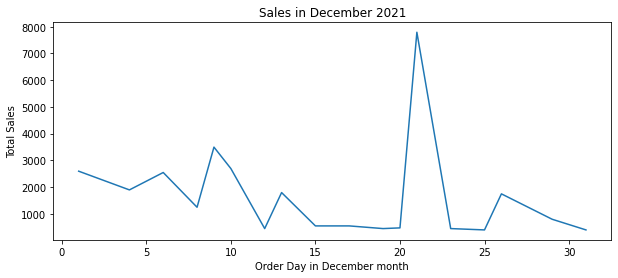

In [30]:
date_december=data[data.order_month==12].groupby(["order_day"]).aggregate({"item_total":"sum"}).reset_index()
date_december

plt.figure(figsize=(10,4))

lp = sns.lineplot(data=date_december,x="order_day",y="item_total",markers=True,ci=0)

plt.ylabel('Total Sales')

plt.xlabel('Order Day in December month')

plt.title("Sales in December 2021")

***
* As I thought, sales increased due to Christmas.
***

## Correlation Analysis

In [31]:
data["cod"]=data["cod"].map({"Online": 0, "Cash On Delivery":1})
data["order_status"]=data["order_status"].map({"Returned to seller": 0, "Delivered to buyer":1})

<AxesSubplot:>

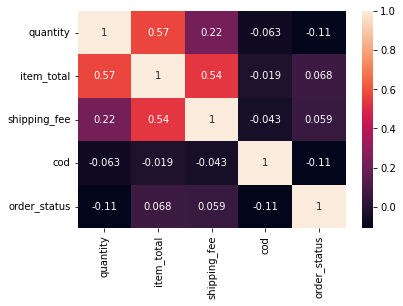

In [32]:
feature_of_interest=["quantity","item_total","shipping_fee","cod","order_status"]
sns.heatmap(data[feature_of_interest].corr(),annot=True)

***
* Item_total and Quantity has medium positive correlation
* Shipping_fee and Item_total has medium positive correlation
* There is no any other signigicant correlations.
* Item total vs Quantity and Item total vs Shipping Fee correlation is as expected. The number of quantity and shipping fee increases with sales.
***

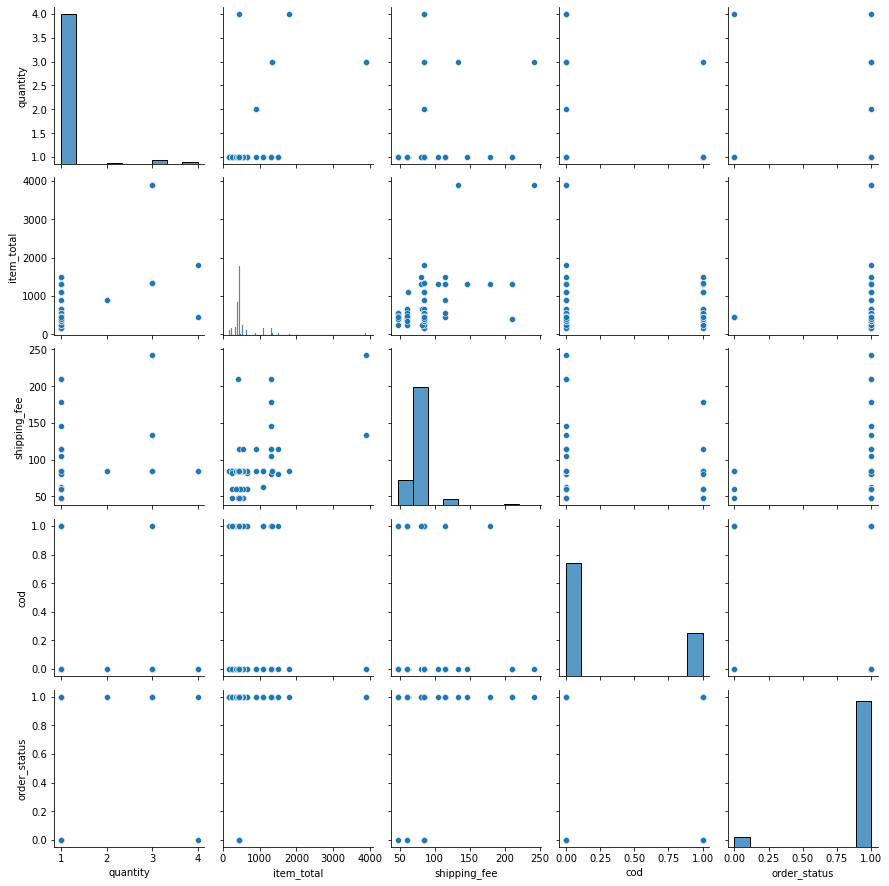

In [33]:
sns.pairplot(data[feature_of_interest])

***
* Paitplots do not show linear relationship with order_status
* Non-linear and tree based algoritms might work well with classification model.
***

In [34]:
data.head(2)

,order_no,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,order_year,order_month,order_week,order_day,order_weekday,order_time,order_date_extracted
0,405-9763961-5211537,MR.,CHANDIGARH,CHANDIGARH,2X3C0FKNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,84.96,0,1,2021,7,28,18,6,22:38:00,2021-07-18
1,404-3964908-7850720,MINAM,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,0,1,2021,10,42,19,1,18:05:00,2021-10-19


## Classification Models

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [36]:
feature_of_interest=["quantity","item_total","shipping_fee","cod","order_status"]
classification_data=data[feature_of_interest].copy()
X=classification_data.iloc[:,:-1]
y=classification_data.iloc[:,-1]  # order status

In [37]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [38]:
classifiers=[LogisticRegression(),RandomForestClassifier(),GaussianNB(),SVC(),DecisionTreeClassifier(),XGBClassifier()]
for classifier in classifiers:
    accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 5)
    print (classifier)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print("")

LogisticRegression()
Accuracy: 93.58 %
Standard Deviation: 1.08 %

RandomForestClassifier()
Accuracy: 91.82 %
Standard Deviation: 1.16 %

GaussianNB()
Accuracy: 64.94 %
Standard Deviation: 7.03 %

SVC()
Accuracy: 93.58 %
Standard Deviation: 1.08 %

DecisionTreeClassifier()
Accuracy: 91.82 %
Standard Deviation: 1.16 %

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_sta

***
* Logistic Regression and Support Vector Classifier have highest accurisies to guess classes.
* Number of train data is low, therefore I did not use train_test_split because returned to seller class has only 11 elements.
* I can make some improvement with GridSearchCV for different models
***